## Mean / Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).



### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)

If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)

### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.


### When to use mean / median imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [5]:
#  explore the missing data in the train set

X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [6]:
#  make a function to fill missing values with the mean or median:



def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [7]:
# calculate the median Age

median = X_train.age.median()
median

28.0

In [8]:
# calculate the mean Age

mean = X_train.age.mean()
mean

30.23144399460189

In [9]:
# create a new variable with the missing values replaced

# first replace with the median
X_train['Age_median'] = impute_na(X_train, 'age', median)

# now replace with the mean
X_train['Age_mean'] = impute_na(X_train, 'age', mean)

# round to 1  using the round function from numpy
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)

X_train.head(15)

,age,fare,Age_median,Age_mean
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,28.0,30.2
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,28.0,30.2
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


In [10]:
# ee a change in the variance after mean / median imputation


print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  194.16304666581863
Variance after median imputation:  157.79842957602128
Variance after mean imputation:  157.0217073519937


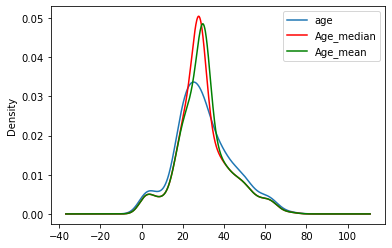

In [11]:
#  see that the distribution has changed  with now more values accumulating towards the median  or median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
#  mean / median imputation may affect the relationship  with the other variables in the dataset, let's have a look

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

,fare,age,Age_median,Age_mean
fare,2248.326729,136.176223,114.961682,110.198311
age,136.176223,194.163047,194.163047,194.159033
Age_median,114.961682,194.163047,157.798430,157.035694
Age_mean,110.198311,194.159033,157.035694,157.021707


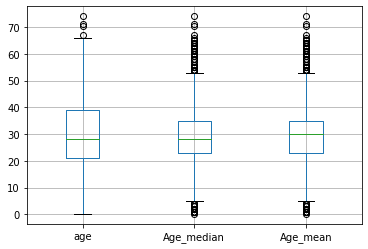

In [13]:
# mean / median imputation may lead  to observations that are normal, to look like outliers
X_train[['age', 'Age_median', 'Age_mean']].boxplot()